# capstone project 1
                                                                                                         BY Chandan Lohar 


## Dataset="TaxiFare"
## Performed model              
* 1) Linear Regression   
* 2) Random Forest 
* 3) Decision Tree
* 4) AdaBoost
* 5) Gradient Boosting  
* 6) Bagging   

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline

import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
print("Libraries Import Successfully")

Libraries Import Successfully


In [2]:

datatype={"unique_id": "object","amount": "float64","date_time_of_pickup": "object", "longitude_of_pickup": "float64","latitude_of_pickup": "float64", "longitude_of_dropoff": "float64", "latitude_of_dropoff": "float64","no_of_passenger" : "int64" }

df_raw = pd.read_csv("TaxiFare (1).csv", low_memory=False, nrows=10**5, dtype=datatype, parse_dates=["date_time_of_pickup"])
df_raw.drop(['unique_id'], axis=1, inplace=True)

df_raw.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
#Printing Shape of Dataset 
print("Shape of Dataset: ",df_raw.shape)

Shape of Dataset:  (50000, 7)


# Data Dictionary

* date_time_of_pickup: Timestamp value indicating when the taxi ride started.

* longitude_of_pickup: Longitude coordinate of where the taxi ride started.

* latitude_of_pickup: Latitude coordinate of where the taxi ride started.

* longitude_of_dropoff: Longitude coordinate of where the taxi ride ended.

* latitude_of_dropoff: Latitude coordinate of where the taxi ride ended.

* no_of_passenger: Indicating the number of passengers in the taxi ride.

### Target

* amount: Dollar amount of the cost of the taxi ride.

In [4]:
#Creating datetime features based on ptckup_datetime
import calendar

df_raw['pickup_date']= df_raw['date_time_of_pickup'].dt.date
df_raw['pickup_day']=df_raw['date_time_of_pickup'].apply(lambda x:x.day)
df_raw['pickup_hour']=df_raw['date_time_of_pickup'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week']=df_raw['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df_raw['pickup_month']=df_raw['date_time_of_pickup'].apply(lambda x:x.month) 
df_raw['pickup_year']=df_raw['date_time_of_pickup'].apply(lambda x:x.year)
df_raw.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [5]:
df_raw.describe ()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [6]:
df_raw = df_raw[((df_raw['longitude_of_pickup'] > -78) &
                 (df_raw['longitude_of_pickup'] <-70)) &
                ((df_raw['longitude_of_dropoff']>-78) &
                 (df_raw['longitude_of_dropoff']<-70)) & 
                ((df_raw['latitude_of_pickup']> 37) & 
                 (df_raw['latitude_of_pickup'] <45)) & 
                 ((df_raw['latitude_of_dropoff']> 37)&
                 (df_raw['latitude_of_dropoff'] <45)) & 
                 (df_raw['no_of_passenger']> 0) & 
                 (df_raw['amount'] >= 2.5)]

In [7]:
df_raw.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.664139,13.482757,6.276233,2011.739770
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659466,6.504260,3.461211,1.867738
min,2.500000,-75.423848,38.754215,-75.354559,39.604971,1.00000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000


In [8]:
df_raw.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
dtype: int64

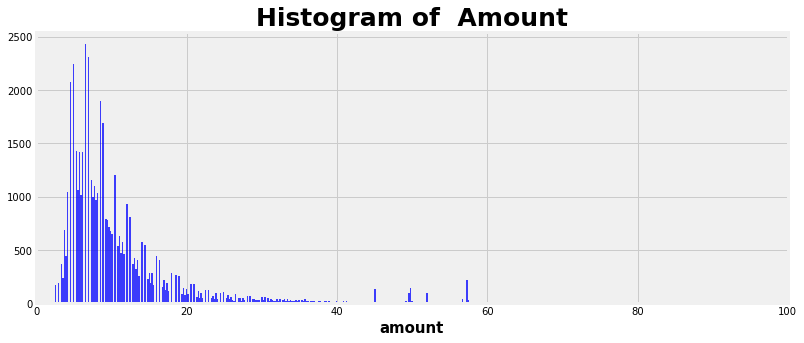

In [9]:
plt.figure(figsize = (12, 5))
n, bins, patches = plt.hist(df_raw.amount, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('amount', fontsize=15, fontweight='bold')
plt.title("Histogram of  Amount", fontsize=25, fontweight="bold")
plt.xlim(0, 100)
plt.show();

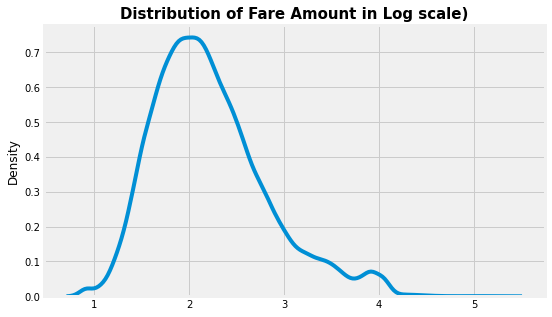

In [10]:
plt.figure(figsize=(8,5))

sns.kdeplot(np.log(df_raw['amount'].values)).set_title( "Distribution of Fare Amount in Log scale)", fontsize=15, fontweight='bold');

In [11]:
df_raw['amount'].value_counts(normalize=True).iloc[:5]

6.5    0.049423
4.5    0.042190
8.5    0.038563
5.3    0.028810
6.1    0.028769
Name: amount, dtype: float64

Text(0, 0.5, 'Count')

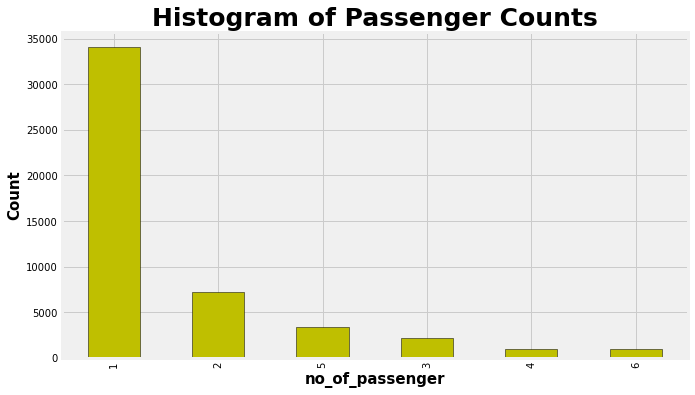

In [12]:
plt.figure(figsize=(10,6))
df_raw['no_of_passenger'].value_counts().plot.bar(color = 'y', edgecolor = 'k'); 
plt.title('Histogram of Passenger Counts', fontsize=25, fontweight='bold') 
plt.xlabel("no_of_passenger", fontsize=15, fontweight="bold") 
plt.ylabel('Count', fontsize=15, fontweight='bold')



Text(0, 0.5, 'Count')

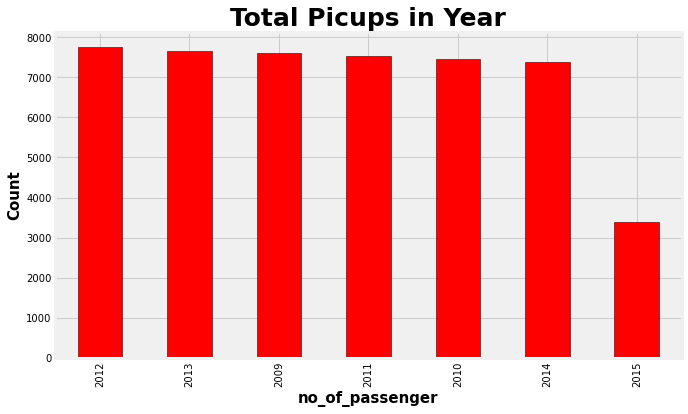

In [13]:
plt.figure(figsize=(10,6)) 
df_raw['pickup_year'].value_counts().plot.bar (color="r", edgecolor ='k');
plt.title('Total Picups in Year', fontsize=25, fontweight='bold') 
plt.xlabel("no_of_passenger", fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')


Text(0, 0.5, 'Count')

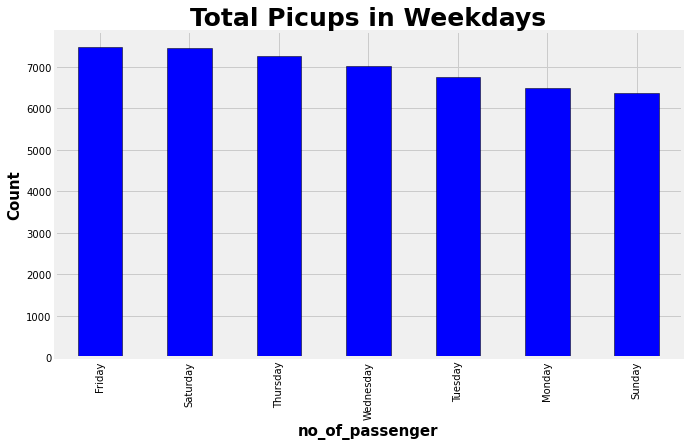

In [14]:
plt.figure(figsize=(10,6)) 
df_raw['pickup_day_of_week'].value_counts().plot.bar (color="b", edgecolor ='k');
plt.title('Total Picups in Weekdays', fontsize=25, fontweight='bold') 
plt.xlabel("no_of_passenger", fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')

In [15]:
df_raw["no_of_passenger"].value_counts()

1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: no_of_passenger, dtype: int64

In [16]:
import numpy as np

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # PI/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

# Add new column to dataframe with distance in miles 
df_raw['distance_miles'] = distance(df_raw.latitude_of_pickup, df_raw.longitude_of_pickup, df_raw.latitude_of_dropoff, df_raw.longitude_of_dropoff)

df_raw.head()


,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


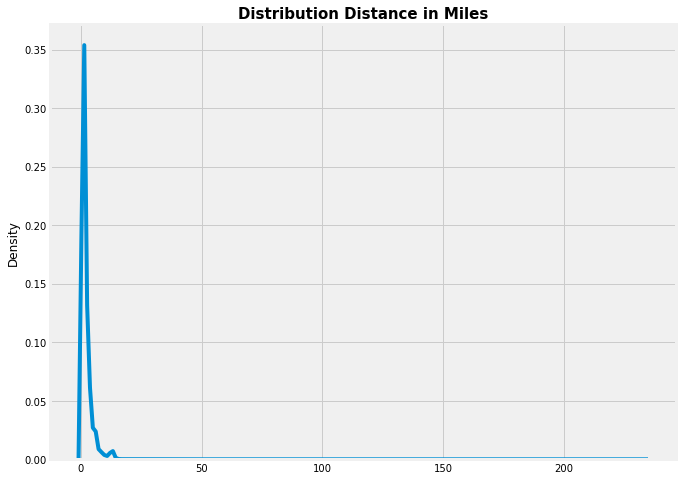

In [17]:
plt.figure(figsize=(10,8))

sns.kdeplot(df_raw['distance_miles'].values).set_title( "Distribution Distance in Miles", fontsize=15, fontweight='bold');

In [18]:
df_final=df_raw.copy()
df_final.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [19]:
Variables = {'Monday': 1, 'Tuesday': 2, 'Thursday': 3, 'Saturday': 4, 'Wednesday': 5, 'Sunday': 6, 'Friday': 7}
year = {2012: 1,2013: 12,2011: 3,2009: 4,2010: 5, 2014: 6,2015:7}

df_final['pickup_year'] = df_final['pickup_year'].map(year)
df_final['pickup_day_of_week'] = df_final['pickup_day_of_week'].map(Variables)

df_final.drop(['date_time_of_pickup','pickup_date'], axis=1, inplace=True)

df_final.head()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


In [33]:
df_final.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
distance_miles          0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['amount'], axis=1)
y = df_final[['amount']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Test RMSE: %.3f" % (mean_squared_error(y_test, y_pred) ** 0.5))


Test RMSE: 8.518


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Test RMSE: %.3f" % (mean_squared_error(y_test, y_pred) ** 0.5))


Test RMSE: 4.658


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

dt = DecisionTreeRegressor(max_depth=5, random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Test RMSE: %.3f" % (mean_squared_error(y_test, y_pred) ** 0.5))

Test RMSE: 4.885


In [39]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


ada = AdaBoostRegressor(random_state=0, n_estimators=100)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("Test RMSE: %.3f" % (mean_squared_error(y_test, y_pred) ** 0.5))


Test RMSE: 8.253


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb = GradientBoostingRegressor(random_state=0, n_estimators=100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Test RMSE: %.3f" % (mean_squared_error(y_test, y_pred) ** 0.5))


Test RMSE: 4.362


In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

bag = BaggingRegressor(random_state=0, n_estimators=100)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print("Test RMSE: %.3f" % (mean_squared_error(y_test, y_pred) ** 0.5))


Test RMSE: 4.223


In [43]:
from sklearn.metrics import mean_squared_error
import pandas as pd

# Models
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'Bagging']

# Model instances
model_instances = [LinearRegression(), 
                   RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200),
                   DecisionTreeRegressor(max_depth=5, random_state=0),
                   AdaBoostRegressor(random_state=0, n_estimators=100),
                   GradientBoostingRegressor(random_state=0, n_estimators=100),
                   BaggingRegressor(random_state=0, n_estimators=100)]

# Training and evaluating models
results = []

for model, model_name in zip(model_instances, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append({'Model': model_name, 'Test RMSE': rmse})

# Creating a DataFrame from the results
results_df = pd.DataFrame(results)

# Displaying the results table
print(results_df)

               Model  Test RMSE
0  Linear Regression   8.517908
1      Random Forest   4.658324
2      Decision Tree   4.884992
3           AdaBoost   8.253207
4  Gradient Boosting   4.362318
5            Bagging   4.223291



Linear Regression: The linear regression model has a test RMSE of 8.52. This may be considered a baseline performance for regression tasks.

Random Forest: The random forest model performs better with a lower test RMSE of 4.66 compared to linear regression, indicating improved predictive accuracy.

Decision Tree: The decision tree model has a test RMSE of 4.88, which is similar to random forest but may be more prone to overfitting due to its structure.

AdaBoost: The AdaBoost model shows a test RMSE of 8.25, which is worse than random forest. AdaBoost might not be the best choice for this particular task.

Gradient Boosting: The gradient boosting model performs well with a lower test RMSE of 4.36, suggesting strong predictive capabilities.

Bagging: The bagging model has the lowest test RMSE of 4.22 among all models, indicating good generalization and predictive performance.

## Conclusion:

The bagging model appears to be the most promising for this task based on the lowest test RMSE.
Random Forest and Gradient Boosting also perform well, offering viable alternatives.
Linear Regression and AdaBoost exhibit higher RMSE, suggesting they may not capture the underlying patterns as effectively for this specific dataset.
It's important to note that the choice of the best model depends on the specific requirements of your task and the trade-offs you are willing to make between interpretability and predictive performance. Further fine-tuning and hyperparameter optimization could potentially improve the performance of these models.